In [2]:
import numpy as np
import pandas as pd 
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA


In [12]:
df = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/data_pickle/Episode_1.pkl')

print(df)

       Person                   Said  \
0        Ross         Hey everybody!   
1        Ross    Happy Thanksgiving!   
2    Chandler            No, no, no.   
3    Chandler              No-no-no.   
4    Chandler      Joey, Rachel, and   
..        ...                    ...   
387  Chandler            You got it.   
388  Chandler  You got Nevada twice.   
389      Ross                I know.   
390  Chandler                  Yeah.   
391  Chandler                    End   

                                             Embedding  
0    [-0.062920064, 0.022200363, 0.077420674, 0.018...  
1    [0.0068210554, -0.04483597, 0.05375574, 0.0121...  
2    [-0.01032704, 0.043254893, -0.0013291296, -0.0...  
3    [-0.030846858, 0.046789076, 0.025940027, -0.01...  
4    [0.0065053697, 0.008122341, -0.013783344, -0.0...  
..                                                 ...  
387  [-0.065191, 0.010189469, -0.040940475, -0.0269...  
388  [0.067159146, 0.009690686, 0.0079465555, 0.080...  
389  [

In [13]:
#Load Data
data = np.stack(df['Embedding'])
pca = PCA(20)
 
#Transform the data
df2 = pca.fit_transform(data)
df2.shape

(392, 20)

In [14]:
num_clusters=20
#Initialize the class object
kmeans = KMeans(
    n_clusters=num_clusters, 
    init='k-means++', 
    max_iter=100, 
    n_init=25)
#kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df2)

# adding a cluster column to the dataset
df['Cluster']= label
u_labels = np.unique(label)

In [15]:
 # create a dataframe that contains 
# clusters matched to pages and their queries 
mapping = list(zip(df['Person'],label, df['Embedding']))
clusters = pd.DataFrame(mapping, columns=['Person','Cluster','Embedding'])
clusters

,Person,Cluster,Embedding
0,Ross,14,"[-0.062920064, 0.022200363, 0.077420674, 0.018..."
1,Ross,12,"[0.0068210554, -0.04483597, 0.05375574, 0.0121..."
2,Chandler,6,"[-0.01032704, 0.043254893, -0.0013291296, -0.0..."
3,Chandler,6,"[-0.030846858, 0.046789076, 0.025940027, -0.01..."
4,Chandler,4,"[0.0065053697, 0.008122341, -0.013783344, -0.0..."
...,...,...,...
387,Chandler,6,"[-0.065191, 0.010189469, -0.040940475, -0.0269..."
388,Chandler,13,"[0.067159146, 0.009690686, 0.0079465555, 0.080..."
389,Ross,0,"[0.019815138, 0.075206704, -0.020553736, -0.04..."
390,Chandler,0,"[-0.14641151, 0.0056530065, -0.009107509, -0.0..."


C:\Users\amaca253\Anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amaca253\Anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amaca253\Anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

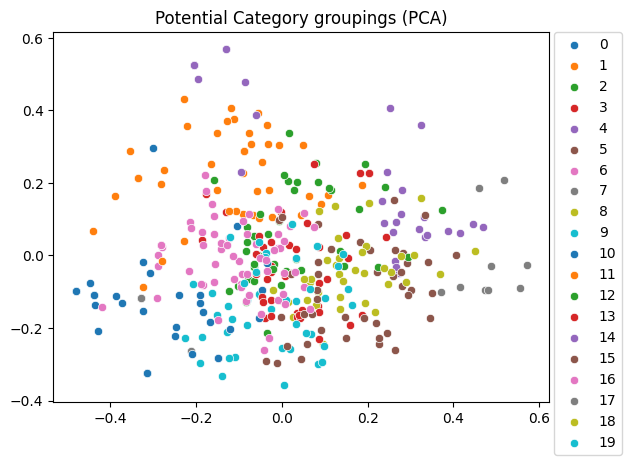

In [16]:
# plot the cluster 
for i in u_labels:
    sns.scatterplot(df2[label == i , 0] , df2[label == i , 1] , label = i,palette='Set2')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title('Potential Category groupings (PCA)')
plt.show()

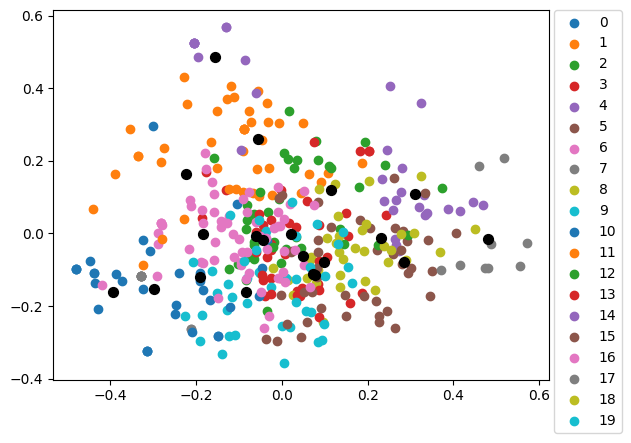

In [17]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

plt.show()

In [18]:
from scipy.spatial.distance import euclidean

# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]

    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])
    
    # Testing:    
    print('closest point to cluster center: ', cluster_pts[min_idx])
    print('closest index of point to cluster center: ', cluster_pts_indices[min_idx])
    print('  ', df2[cluster_pts_indices[min_idx]])
    closest_pt_idx.append(cluster_pts_indices[min_idx])
    print(df['Person'][cluster_pts_indices[min_idx]],':',df['Said'][cluster_pts_indices[min_idx]])

closest point to cluster center:  [-0.43797785 -0.10975245  0.4437678   0.09719516  0.11764767  0.08417914
 -0.03391951 -0.03578013 -0.00328819  0.05775682  0.18759134 -0.04456335
  0.06788724 -0.07687362  0.00531151  0.00972997 -0.0353645   0.01886098
  0.09423549  0.00719429]
closest index of point to cluster center:  29
   [-0.43797785 -0.10975245  0.4437678   0.09719516  0.11764767  0.08417914
 -0.03391951 -0.03578013 -0.00328819  0.05775682  0.18759134 -0.04456335
  0.06788724 -0.07687362  0.00531151  0.00972997 -0.0353645   0.01886098
  0.09423549  0.00719429]
Joey : Huh?
closest point to cluster center:  [-0.05665608  0.3939995  -0.1756314   0.04715233 -0.03455982 -0.05260154
  0.03896217 -0.14607336 -0.17933552  0.00914765 -0.02939471 -0.10109431
  0.03743159  0.03425612  0.05878789 -0.06726406  0.02212248 -0.10755609
 -0.10291953  0.04533366]
closest index of point to cluster center:  123
   [-0.05665608  0.3939995  -0.1756314   0.04715233 -0.03455982 -0.05260154
  0.03896217 

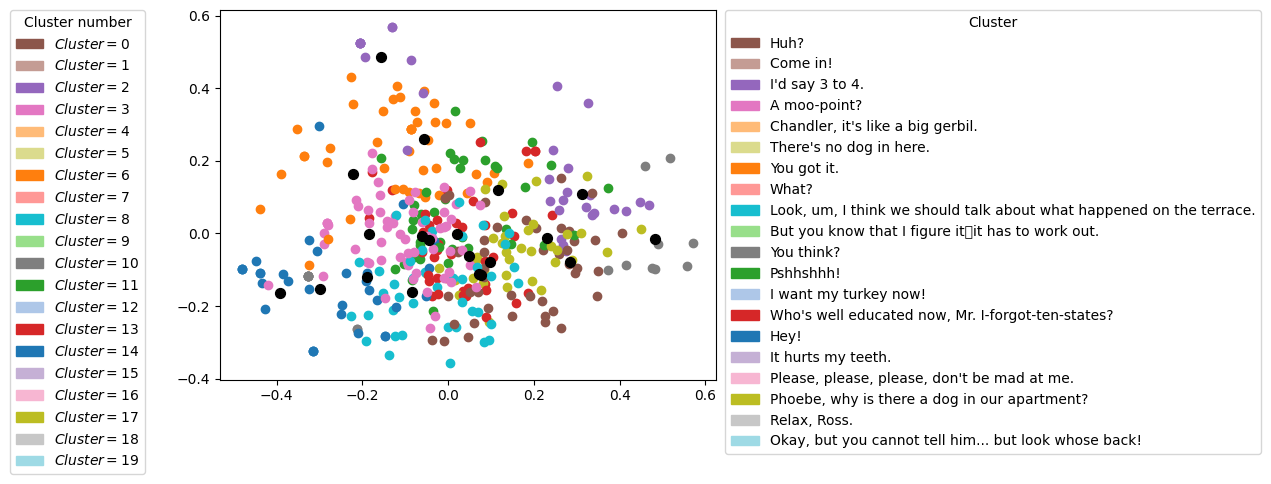

In [25]:
import matplotlib.patches as mpatches
text = [df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
colors = sns.color_palette('tab20', 20)
ind_col_map = {x:y for x, y in zip(df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

fig = plt.figure()
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)

ax.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')


legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text[key]))
    
legend_list2 = []
for key in ind_col_map.keys():
    legend_list2.append(mpatches.Patch(color=ind_col_map[key],label=f'$Cluster = {key}$'))

first_legend=ax.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)

ax.legend(title='Cluster number',bbox_to_anchor= (-0.15,1),handles=legend_list2, loc='upper right',borderaxespad=0)
ax.add_artist(first_legend)
plt.show()

In [27]:
# Plot for each cluster where are the characters

# to do: a dataset that gives for each characters the PCA1/PCA2... and the cluster belonging
sns.set()
sns.set_style("whitegrid")
sns.lmplot(
    x='PC2', 
    y='PC1', 
    data=df2, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
sns.despine()

plt.title('2D PCA Graph')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

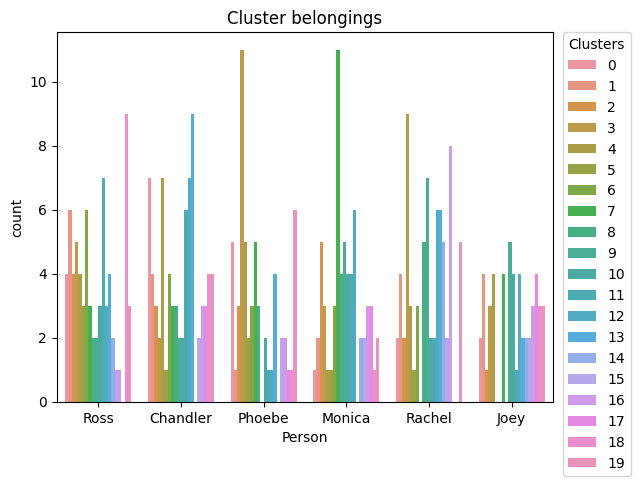

In [12]:
sns.countplot(x='Person', data=clusters, hue='Cluster')
plt.legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Cluster belongings')
plt.show()

In [13]:
counts = clusters.groupby(['Person', 'Cluster']).size().unstack().reset_index().fillna(0)
new_df = pd.DataFrame(counts)

new_df

Cluster,Person,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,Chandler,7.0,4.0,3.0,2.0,7.0,1.0,4.0,3.0,3.0,...,2.0,6.0,7.0,9.0,0.0,2.0,3.0,3.0,4.0,4.0
1,Joey,2.0,4.0,1.0,3.0,4.0,0.0,0.0,4.0,0.0,...,4.0,1.0,4.0,2.0,2.0,2.0,3.0,4.0,3.0,3.0
2,Monica,1.0,2.0,5.0,3.0,1.0,1.0,3.0,11.0,4.0,...,4.0,4.0,6.0,0.0,2.0,2.0,3.0,3.0,1.0,2.0
3,Phoebe,5.0,1.0,3.0,11.0,5.0,2.0,3.0,5.0,3.0,...,2.0,1.0,1.0,4.0,0.0,2.0,2.0,1.0,1.0,6.0
4,Rachel,2.0,4.0,2.0,9.0,3.0,1.0,3.0,0.0,5.0,...,2.0,2.0,6.0,6.0,5.0,2.0,8.0,0.0,0.0,5.0
5,Ross,4.0,6.0,4.0,5.0,4.0,3.0,6.0,3.0,2.0,...,3.0,7.0,3.0,4.0,2.0,1.0,1.0,0.0,9.0,3.0


In [14]:
counts = clusters.groupby(['Person','Cluster']).count().unstack().fillna(0)
new_df = pd.DataFrame(counts)

new_df

# Calculate the sum of counts for each person (row-wise)
sum_per_person = counts.sum(axis=1)

# Divide each count by the sum per person and multiply by 100 to get the percentage
percentage_df = counts.divide(sum_per_person, axis=0) * 100

# Display the resulting DataFrame
print(percentage_df)

         Embedding                                                     \
Cluster         0         1         2          3         4         5    
Person                                                                  
Chandler  9.210526  5.263158  3.947368   2.631579  9.210526  1.315789   
Joey      3.921569  7.843137  1.960784   5.882353  7.843137  0.000000   
Monica    1.587302  3.174603  7.936508   4.761905  1.587302  1.587302   
Phoebe    8.620690  1.724138  5.172414  18.965517  8.620690  3.448276   
Rachel    2.777778  5.555556  2.777778  12.500000  4.166667  1.388889   
Ross      5.555556  8.333333  5.555556   6.944444  5.555556  4.166667   

                                                                       \
Cluster         6          7         8         9         10        11   
Person                                                                  
Chandler  5.263158   3.947368  3.947368  2.631579  2.631579  7.894737   
Joey      0.000000   7.843137  0.000000  9.803922 

In [15]:
characters = np.unique(df['Person'])
clusters = [i for i in np.arange(num_clusters)]

num_characters = len(characters)

# Create a matrix with the required dimensions
matrix = np.zeros((num_characters, 21), dtype=object)  # 21 columns: 1 for character, 20 for zeros

# Populate the first column with the characters
matrix[:, 0] = characters

# Update the matrix by reading the dataset.
for i in np.arange(len(df)):
    character = df['Person'][i]
    cluster = df['Cluster'][i]
    character_index = np.where(matrix[:, 0] == character)[0]
    matrix[character_index,cluster+1] += 1 
print(matrix)

[['Chandler' 7 4 3 2 7 1 4 3 3 2 2 6 7 9 0 2 3 3 4 4]
 ['Joey' 2 4 1 3 4 0 0 4 0 5 4 1 4 2 2 2 3 4 3 3]
 ['Monica' 1 2 5 3 1 1 3 11 4 5 4 4 6 0 2 2 3 3 1 2]
 ['Phoebe' 5 1 3 11 5 2 3 5 3 0 2 1 1 4 0 2 2 1 1 6]
 ['Rachel' 2 4 2 9 3 1 3 0 5 7 2 2 6 6 5 2 8 0 0 5]
 ['Ross' 4 6 4 5 4 3 6 3 2 2 3 7 3 4 2 1 1 0 9 3]]


In [59]:
# Percentage

matrix2= matrix

for i in np.arange(0,len(matrix[0:])):
    row = matrix[i,1:]
    row_sum = sum(row)
    for j in np.arange(1,num_clusters+1):
        element = matrix[i,j]
        percentage = (element/row_sum)*100
        matrix2[i,j]= percentage
        
print(matrix2)

[['Chandler' 9.210526315789476 5.263157894736844 3.9473684210526336
  2.631578947368422 9.210526315789476 1.315789473684211 5.263157894736844
  3.9473684210526336 3.9473684210526336 2.631578947368422
  2.631578947368422 7.894736842105267 9.210526315789476
  11.842105263157897 0.0 2.631578947368422 3.9473684210526336
  3.9473684210526336 5.263157894736844 5.263157894736844]
 ['Joey' 3.921568627450981 7.843137254901962 1.9607843137254906
  5.882352941176472 7.843137254901962 0.0 0.0 7.843137254901962 0.0
  9.803921568627455 7.843137254901962 1.9607843137254906
  7.843137254901962 3.921568627450981 3.921568627450981 3.921568627450981
  5.882352941176472 7.843137254901962 5.882352941176472 5.882352941176472]
 ['Monica' 1.5873015873015872 3.1746031746031744 7.936507936507936
  4.761904761904762 1.5873015873015872 1.5873015873015872
  4.761904761904762 17.46031746031746 6.349206349206349 7.936507936507936
  6.349206349206349 6.349206349206349 9.523809523809524 0.0
  3.1746031746031744 3.1746

In [71]:
import matplotlib.pyplot as plt
import numpy as np


names = [row[0] for row in matrix2]
cluster_percentages = [row[1:] for row in matrix2]

# Convert cluster percentages to numpy array for plotting
cluster_percentages = np.array(cluster_percentages)

# Plotting
fig, ax = plt.subplots()
x = np.arange(len(names))

# Plotting each cluster's percentage as a grouped bar
bar_width = 0.2
num_clusters = len(cluster_percentages[0])

ax.set_xlabel('Names')
ax.set_ylabel('Percentage')
ax.set_title('Cluster Percentages for Each Name')
ax.set_xticks(x)
ax.set_xticklabels(names)
plt.legend(title='Clusters percentage', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.show()



TypeError: 'list' object cannot be interpreted as an integer

In [ ]:
# Generate a custom color palette with 20 distinct colors
colors = sns.color_palette('tab20', 20)

# Plotting the bar plot with custom colors
percentage_df.plot(kind='bar', stacked=True, color=colors)

# Adding labels and title
plt.xlabel('Characters')
plt.ylabel('Percentage per Cluster')
plt.legend(title='Clusters percentage', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Percentage per Cluster of Each Person')

# Displaying the plot
plt.show()

# plot in the legend the phrase of the center of the cluster 

In [ ]:
 # create a dataframe that contains 
# clusters matched to pages and their queries 
mapping = list(zip(df['Person'],label, df['Embedding']))
clusters = pd.DataFrame(mapping, columns=['Person','Cluster','Embedding'])
clusters

In [ ]:
# Calculate average sentence embeddings for each cluster
cluster_centers = kmeans.cluster_centers_

# Find nearest sentences to the average embedding in each cluster
for i in range(num_clusters):
    cluster_sentences = np.array(sentences)[cluster_labels == i]
    cluster_sentence_embeddings = sentence_embeddings[cluster_labels == i]
    average_embedding = cluster_centers[i]

    # Compute cosine similarity
    similarity_scores = np.dot(cluster_sentence_embeddings, average_embedding) / (
            np.linalg.norm(cluster_sentence_embeddings, axis=1) * np.linalg.norm(average_embedding))

    # Sort sentences based on similarity
    sorted_indices = np.argsort(similarity_scores)[::-1]
    
    # Calculate distances to average vector
    distances = np.linalg.norm(cluster_sentence_vectors - average_vector, axis=1)
    nearest_sentence_index = np.argmin(distances)
    nearest_sentence = cluster_sentences[nearest_sentence_index]

    # Print sentences near the average embedding
    print(f"Cluster {i+1}:")
    print(f"Nearest sentence: {nearest_sentence}")
    for j in range(5):
        print(cluster_sentences[sorted_indices[j]])
    print('\n')